In [1]:
# Import libraries
import numpy as np
import pandas as pd
import time
import os.path
import matplotlib.pyplot as plt
from datetime import timedelta
%matplotlib inline
os.chdir('C:\\Users\\anear\\OneDrive - National University of Ireland, Galway\\PhD\\Research Projects\\Ventilation Project')

In [2]:
# Load the patient data
_data = np.load('data/final_patients.npy', allow_pickle=True).tolist()
patients = _data['patients']
print("Loaded the patient data...")

# Load the general features
_data = np.load('data/general_features.npy', allow_pickle=True).tolist()
bicarb = _data['bicarb']
bilirubin = _data['bilirubin']
bp = _data['bp']
fio2 = _data['fio2']
gcs_eyes = _data['gcs_eyes']
gcs_motor = _data['gcs_motor']
gcs_verbal = _data['gcs_verbal']
hr = _data['hr']
pao2 = _data['pao2']
potassium = _data['potassium']
resp = _data['resp']
sodium = _data['sodium']
spo2 = _data['spo2']
temp = _data['temp']
urea = _data['urea']
urine = _data['urine']
wbc = _data['wbc']
print("... and the general features...")

# Load the ventilator features
_data = np.load('data/ventilator_features.npy', allow_pickle=True).tolist()
fentanyl_cv = _data['fentanyl_cv']
fentanyl_mv = _data['fentanyl_mv']
ie_ratio = _data['ie_ratio']
insp_flow = _data['insp_flow']
insp_press = _data['insp_press']
peep = _data['peep']
propofol_cv = _data['propofol_cv']
propofol_mv = _data['propofol_mv']
psv = _data['psv']
tidvol_obs = _data['tidvol_obs']
tidvol_set = _data['tidvol_set']
tidvol_spon = _data['tidvol_spon']
print("... and the ventilator features!")

Loaded the patient data...
... and the general features...
... and the ventilator features!


In [3]:
# Function that creates hourly time series from raw data
def time_series_24h(feature, hrs=24):
    
    '''
    feature is a list of numpy arrays, where each array contains all measurements for one patient and the times they were taken
    hrs is the number of hours before extubation, with the default set to 24
    Also requires patients, a pandas DataFrame with patient details
    '''
    
    # Initialise a numpy array
    m = len(feature) # number of patients
    processed_feature = np.zeros((m,hrs))
    
    # Iterate over every patient
    for i in range(m):
        
        # Get their data
        raw_time = feature[i][:,0]
        data = feature[i][:,1]
        ext_time = patients.iloc[i]['endtime'] # extubation time
        
        # Re-format time to have time series finishing at time of extubation
        diff_time = raw_time - ext_time
        days = np.array([x.days for x in diff_time])
        seconds = np.array([x.seconds for x in diff_time])
        pre_ext_time = hrs + days*24 + seconds/(60*60)
        
        # Account for patients with no measurements
        if len(data) == 0:
            processed_feature[i,:] = -np.ones((1,hrs))
        
        else:
        
        # Create hourly time series
            for k in range(hrs):
                mask = np.all([pre_ext_time>=k,pre_ext_time<(k+1)], axis=0)
                values = data[mask]
                x = 1
                while len(values) == 0:
                    mask = np.all([pre_ext_time>=(k-x),pre_ext_time<(k+1+x)], axis=0)
                    values = data[mask]
                    x+=1
                mean_values = np.mean(values)
                processed_feature[i,k] = mean_values
        
    # Return the numpy array
    return processed_feature

In [4]:
# Function that creates hourly time series from raw data
def time_series_12h(feature, hrs=24):
    
    '''
    feature is a list of numpy arrays, where each array contains all measurements for one patient and the times they were taken
    hrs is the number of hours before extubation, with the default set to 24
    Also requires patients, a pandas DataFrame with patient details
    '''
    
    # Initialise a numpy array
    m = len(feature) # number of patients
    processed_feature = np.zeros((m,hrs))
    
    # Iterate over every patient
    for i in range(m):
        
        # Get their data
        raw_time = feature[i][:,0]
        data = feature[i][:,1]
        ext_time = patients.iloc[i]['endtime'] # extubation time
        
        # Re-format time to have time series finishing at time of extubation
        diff_time = raw_time - ext_time
        days = np.array([x.days for x in diff_time])
        seconds = np.array([x.seconds for x in diff_time])
        pre_ext_time = hrs + days*24 + seconds/(60*60) - 12
        
        # Account for patients with no measurements
        if len(data) == 0:
            processed_feature[i,:] = -np.ones((1,hrs))
        
        else:
        
        # Create hourly time series
            for k in range(hrs):
                mask = np.all([pre_ext_time>=(k/2),pre_ext_time<((k/2)+0.5)], axis=0)
                values = data[mask]
                x = 0.5
                while len(values) == 0:
                    mask = np.all([pre_ext_time>=((k/2)-x),pre_ext_time<((k/2)+0.5+x)], axis=0)
                    values = data[mask]
                    x+=0.5
                mean_values = np.mean(values)
                processed_feature[i,k] = mean_values
        
    # Return the numpy array
    return processed_feature

In [5]:
# Function that creates hourly time series from raw data
def time_series_6h(feature, hrs=24):
    
    '''
    feature is a list of numpy arrays, where each array contains all measurements for one patient and the times they were taken
    hrs is the number of hours before extubation, with the default set to 24
    Also requires patients, a pandas DataFrame with patient details
    '''
    
    # Initialise a numpy array
    m = len(feature) # number of patients
    processed_feature = np.zeros((m,hrs))
    
    # Iterate over every patient
    for i in range(m):
        
        # Get their data
        raw_time = feature[i][:,0]
        data = feature[i][:,1]
        ext_time = patients.iloc[i]['endtime'] # extubation time
        
        # Re-format time to have time series finishing at time of extubation
        diff_time = raw_time - ext_time
        days = np.array([x.days for x in diff_time])
        seconds = np.array([x.seconds for x in diff_time])
        pre_ext_time = hrs + days*24 + seconds/(60*60) - 18
        
        # Account for patients with no measurements
        if len(data) == 0:
            processed_feature[i,:] = -np.ones((1,hrs))
        
        else:
        
        # Create hourly time series
            for k in range(hrs):
                mask = np.all([pre_ext_time>=(k/4),pre_ext_time<((k/4)+0.25)], axis=0)
                values = data[mask]
                x = 0.25
                while len(values) == 0:
                    mask = np.all([pre_ext_time>=((k/4)-x),pre_ext_time<((k/4)+0.25+x)], axis=0)
                    values = data[mask]
                    x+=0.25
                mean_values = np.mean(values)
                processed_feature[i,k] = mean_values
        
    # Return the numpy array
    return processed_feature

In [6]:
def check_time_series(feature, patient):
    
    '''
    Plot the processed time series over the raw data to make sure everything is working as expected
    '''
    
    # Generate processed time series
    feature_24h = time_series_24h(feature)
    feature_12h = time_series_12h(feature)
    feature_6h = time_series_6h(feature)
    
    # Get extubation time for individual patient
    ext_time = patients.iloc[patient]['endtime']
    
    # Generate times to plot processed feature
    time_24h = [ext_time - timedelta(hours=1)]
    for i in range(23):
        latest_time = time_24h[0]
        time_24h.insert(0, latest_time - timedelta(hours=1))
    time_12h = [ext_time - timedelta(hours=0.5)]
    for i in range(23):
        latest_time = time_12h[0]
        time_12h.insert(0, latest_time - timedelta(hours=0.5))
    time_6h = [ext_time - timedelta(hours=0.25)]
    for i in range(23):
        latest_time = time_6h[0]
        time_6h.insert(0, latest_time - timedelta(hours=0.25))
    
    # Plot the data
    plt.figure(figsize=(30,6))
    plt.plot(time_24h, feature_24h[patient], '*--', label='24h time series') # processed 24h time series
    plt.plot(time_12h, feature_12h[patient], 's--', label='12h time series') # processed 12h time series
    plt.plot(time_6h, feature_6h[patient], '^--', label='6h time series') # processed 6h time series
    plt.plot(feature[patient][:,0], feature[patient][:,1], 'o-', label='Raw data') # raw data
    plt.vlines(ext_time, ymin=0, ymax=200, colors='r')
    plt.axis([None, None, 0, 200])
    plt.xlim((ext_time - timedelta(days=1), ext_time))
    plt.xlabel('Time')
    plt.ylabel('Measurement value')
    plt.title('Raw and Processed Data')
    plt.grid(axis='x')
    plt.legend()

C:\Users\anear\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


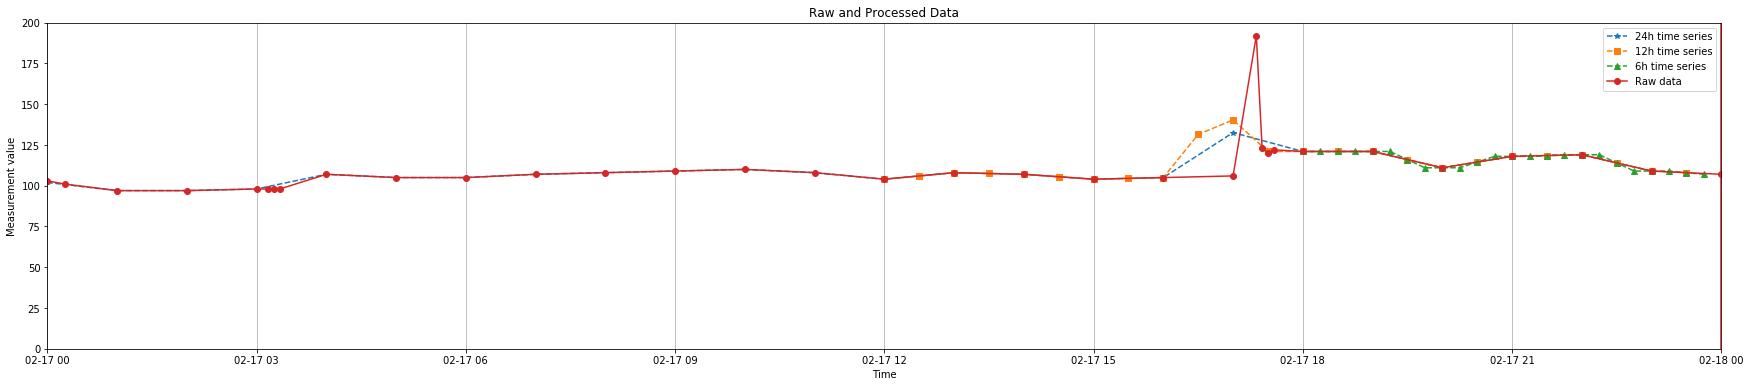

In [7]:
# Plot some sample time series to make sure everything is working properly
check_time_series(hr, 0)

In [8]:
# Create a list of feature names
features = [
    'bicarb',
    'bilirubin',
    'bp',
    'fio2',
    'gcs_eyes',
    'gcs_motor',
    'gcs_verbal',
    'hr',
    'pao2',
    'potassium',
    'resp',
    'sodium',
    'spo2',
    'temp',
    'urea',
    'urine',
    'wbc',
    'fentanyl_cv',
    'fentanyl_mv',
    'ie_ratio',
    'insp_flow',
    'insp_press',
    'peep',
    'propofol_cv',
    'propofol_mv',
    'psv',
    'tidvol_obs',
    'tidvol_set',
    'tidvol_spon'
]

# Generate time series for 6-, 12- and 24-hour periods
for i in range(3):
    
    # Iterate over every feature
    hourly = [6, 12, 24]
    for j in range(len(features)):
    
        # Time how long each feature takes
        start = time.time()
    
        # Define a new variable name
        varname = 'h' + str(hourly[i]) + '_' + features[j]
    
        # Create 24 hour time series for each patient
        exec("{} = time_series_{}h({})".format(varname, str(hourly[i]), features[j]))
    
        # Print the run time
        end = time.time()
        print('{}: {} minutes ({}/{})'.format(varname, round((end-start)/60,2), (i+1)*(j+1), len(features)*3))

h6_bicarb: 0.83 minutes (1/87)
h6_bilirubin: 5.8 minutes (2/87)
h6_bp: 0.82 minutes (3/87)
h6_fio2: 0.44 minutes (4/87)
h6_gcs_eyes: 0.38 minutes (5/87)
h6_gcs_motor: 0.38 minutes (6/87)
h6_gcs_verbal: 0.38 minutes (7/87)
h6_hr: 0.78 minutes (8/87)
h6_pao2: 1.56 minutes (9/87)
h6_potassium: 0.86 minutes (10/87)
h6_resp: 0.85 minutes (11/87)
h6_sodium: 0.82 minutes (12/87)
h6_spo2: 0.79 minutes (13/87)
h6_temp: 0.46 minutes (14/87)
h6_urea: 0.82 minutes (15/87)
h6_urine: 1.56 minutes (16/87)
h6_wbc: 0.86 minutes (17/87)
h6_fentanyl_cv: 1.73 minutes (18/87)
h6_fentanyl_mv: 1.12 minutes (19/87)
h6_ie_ratio: 1.17 minutes (20/87)
h6_insp_flow: 3.6 minutes (21/87)
h6_insp_press: 2.0 minutes (22/87)
h6_peep: 0.42 minutes (23/87)
h6_propofol_cv: 3.37 minutes (24/87)
h6_propofol_mv: 1.49 minutes (25/87)
h6_psv: 0.82 minutes (26/87)
h6_tidvol_obs: 2.02 minutes (27/87)
h6_tidvol_set: 3.06 minutes (28/87)
h6_tidvol_spon: 1.2 minutes (29/87)
h12_bicarb: 0.43 minutes (2/87)
h12_bilirubin: 2.9 minute

In [9]:
# Save to processed_features.npy
if not os.path.exists('./data'):
    os.makedirs('./data')

tosave = {
    'h6_bicarb': h6_bicarb, 'h12_bicarb': h12_bicarb, 'h24_bicarb': h24_bicarb,
    'h6_bilirubin': h6_bilirubin, 'h12_bilirubin': h12_bilirubin, 'h24_bilirubin': h24_bilirubin,
    'h6_bp': h6_bp, 'h12_bp': h12_bp, 'h24_bp': h24_bp,
    'h6_fio2': h6_fio2, 'h12_fio2': h12_fio2, 'h24_fio2': h24_fio2,
    'h6_gcs_eyes': h6_gcs_eyes, 'h12_gcs_eyes': h12_gcs_eyes, 'h24_gcs_eyes': h24_gcs_eyes,
    'h6_gcs_motor': h6_gcs_motor, 'h12_gcs_motor': h12_gcs_motor, 'h24_gcs_motor': h24_gcs_motor,
    'h6_gcs_verbal': h6_gcs_verbal, 'h12_gcs_verbal': h12_gcs_verbal, 'h24_gcs_verbal': h24_gcs_verbal,
    'h6_hr': h6_hr, 'h12_hr': h12_hr, 'h24_hr': h24_hr,
    'h6_pao2': h6_pao2, 'h12_pao2': h12_pao2, 'h24_pao2': h24_pao2,
    'h6_potassium': h6_potassium, 'h12_potassium': h12_potassium, 'h24_potassium': h24_potassium,
    'h6_resp': h6_resp, 'h12_resp': h12_resp, 'h24_resp': h24_resp,
    'h6_sodium': h6_sodium, 'h12_sodium': h12_sodium, 'h24_sodium': h24_sodium,
    'h6_spo2': h6_spo2, 'h12_spo2': h12_spo2, 'h24_spo2': h24_spo2,
    'h6_temp': h6_temp, 'h12_temp': h12_temp, 'h24_temp': h24_temp,
    'h6_urea': h6_urea, 'h12_urea': h12_urea, 'h24_urea': h24_urea,
    'h6_urine': h6_urine, 'h12_urine': h12_urine, 'h24_urine': h24_urine,
    'h6_wbc': h6_wbc, 'h12_wbc': h12_wbc, 'h24_wbc': h24_wbc,
    'h6_fentanyl_cv': h6_fentanyl_cv, 'h12_fentanyl_cv': h12_fentanyl_cv, 'h24_fentanyl_cv': h24_fentanyl_cv,
    'h6_fentanyl_mv': h6_fentanyl_mv, 'h12_fentanyl_mv': h12_fentanyl_mv, 'h24_fentanyl_mv': h24_fentanyl_mv,
    'h6_ie_ratio': h6_ie_ratio, 'h12_ie_ratio': h12_ie_ratio, 'h24_ie_ratio': h24_ie_ratio,
    'h6_insp_flow': h6_insp_flow, 'h12_insp_flow': h12_insp_flow, 'h24_insp_flow': h24_insp_flow,
    'h6_insp_press': h6_insp_press, 'h12_insp_press': h12_insp_press, 'h24_insp_press': h24_insp_press,
    'h6_peep': h6_peep, 'h12_peep': h12_peep, 'h24_peep': h24_peep,
    'h6_propofol_cv': h6_propofol_cv, 'h12_propofol_cv': h12_propofol_cv, 'h24_propofol_cv': h24_propofol_cv,
    'h6_propofol_mv': h6_propofol_mv, 'h12_propofol_mv': h12_propofol_mv, 'h24_propofol_mv': h24_propofol_mv,
    'h6_psv': h6_psv, 'h12_psv': h12_psv, 'h24_psv': h24_psv,
    'h6_tidvol_obs': h6_tidvol_obs, 'h12_tidvol_obs': h12_tidvol_obs, 'h24_tidvol_obs': h24_tidvol_obs,
    'h6_tidvol_set': h6_tidvol_set, 'h12_tidvol_set': h12_tidvol_set, 'h24_tidvol_set': h24_tidvol_set,
    'h6_tidvol_spon': h6_tidvol_spon, 'h12_tidvol_spon': h12_tidvol_spon, 'h24_tidvol_spon': h24_tidvol_spon,
}
np.save('data/processed_features.npy',tosave)
print("Saved!")

Saved!
